In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import seaborn as sns

plt.rcParams.update({'text.usetex':True, 
'font.family':'serif', 
'font.size':18, 
})

colors = sns.color_palette("mako")
colors

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [2]:
# for a given variable w, this function returns F(w)
# if w is the solution of the nonlinear system, then 
# F(w)=0
# F can be interpreted as the residual
def nonlinearEquation(w):
    F = np.zeros(3)
    F[0] = w[0]*w[1]-w[0]*w[2]+24.0
    F[1] = (4.0*w[0]*(w[1]-w[2])*(w[1]+w[2]+w[1]*w[2]))/(w[1]**2*w[2]**2)+(32/9)
    F[2] = (2.0*w[0]**2*(w[1]-w[2])**2)/(w[1]*w[2]*(w[1]+w[2]))-(512./315.)
    return F

In [3]:
# generate an initial guess
initialGuess=np.array([1.0,1.0,10.0])
 
# solve the problem    
solutionInfo=fsolve(nonlinearEquation,initialGuess,full_output=1,xtol=1e-15)
solutionInfo

(array([ 1.85770816,  2.54494456, 15.46408896]),
 {'nfev': 36,
  'fjac': array([[-0.97028018, -0.17128581,  0.17093139],
         [ 0.20968615, -0.94770439,  0.24059947],
         [-0.12078115, -0.26929084, -0.95545505]]),
  'r': array([11.51471183, -2.98681354,  1.87603793, -1.58578733, -0.35915623,
          0.1943227 ]),
  'qtf': array([-1.52132359e-16, -8.41730589e-16, -2.39178316e-16]),
  'fvec': array([0.00000000e+00, 0.00000000e+00, 2.22044605e-16])},
 1,
 'The solution converged.')

In [4]:
w = solutionInfo[0]
for i in range(w.shape[0]):
    print(f'{w[i]:.15f}')

1.857708161877173
2.544944560171334
15.464088962136243


In [5]:
def lj_potential(r,sigma,epsilon):
        U = 4.0*epsilon*((sigma/r)**12-(sigma/r)**6)
        return U

def yk_potential(r,sigma,eps,l):
        return -eps*np.exp(-l*(r/sigma-1.0))/(r/sigma)

In [6]:
sigma = 1.0
epsilon = 1.0
r = np.arange(1.0*sigma,5.0*sigma,0.01*sigma)

Ulj = lj_potential(r,sigma,epsilon)

l = np.array([2.544944560171335,15.46408896213624])
eps = 1.857708161877174*epsilon*np.array([1,-1])
Uyk = yk_potential(r,sigma,eps[0],l[0])+yk_potential(r,sigma,eps[1],l[1])

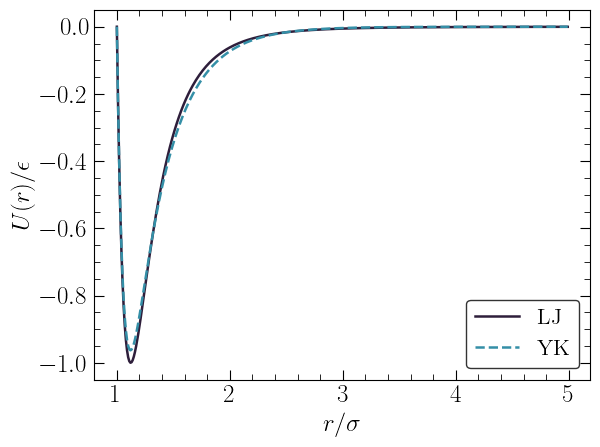

In [8]:
plt.plot(r, Ulj, '-', color=colors[0], linewidth=1.8, label='LJ')
plt.plot(r, Uyk, '--', color=colors[3], linewidth=1.8, label='YK')
plt.xlabel(r'$r/ \sigma$')
plt.ylabel(r'$U(r)/ \epsilon$')
#plt.xlim([-20,520])\
#plt.ylim([-10,290])
plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=18)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=4, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=7, bottom=True, top=True, left=True, right=True)
plt.legend(fontsize=16, frameon=True, edgecolor='k')